**MULTIPLES CLASIFICADORES PARA UNA BASE DE DATOS PARA PREDECIR UN ATAQUE CARDIACO**\
Victor Manuel Buitrago Diaz\
20171005049\
Topicos avanzados en automatica

Conjunto de datos de análisis y predicción de ataques cardíacos
* age : Edad del paciente
* Sex : Sexo del paciente
* exang: angina inducida por el ejercicio (1 = sí; 0 = no)
* ca: número de buques principales (0-3)
* cp : Tipo de dolor torácico tipo de dolor torácico\
  Valor 1: angina típica\
  Valor 2: angina atípica\
  Valor 3: dolor no anginoso\
  Valor 4: asintomático
* trtbps: presión arterial en reposo (en mm Hg)
* chol: colestoral en mg/dl obtenido a través del sensor BMI
* fbs: (azúcar en sangre en ayunas > 120 mg/dl) (1 = verdadero; 0 = falso)
* rest_ecg : resultados electrocardiográficos en reposo\
  Valor 0: normal\
  Valor 1: tener anomalías en la onda ST-T (inversiones de la onda T y/o elevación o depresión del ST > 0,05 mV)\
  Valor 2: mostrar hipertrofia ventricular izquierda probable o definitiva según los criterios de Estes\
* thalach: frecuencia cardíaca máxima alcanzada
* objetivo: 0= menos posibilidades de ataque al corazón 1= más posibilidades de ataque al corazón

link de kaggle dataset.
https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset



In [4]:
from google.colab import files 
uploaded = files.upload()

Saving heart.csv to heart (2).csv


Librerias

In [5]:
import pandas as pd 
import io 
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge
from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
np.random.seed(7)
df = pd.read_csv(io.BytesIO(uploaded['heart.csv'])) 
print(df)

     age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  output  
0      0      1       1  

In [6]:
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [7]:
X=df.iloc[:,:-1]
X

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [12]:
y=df.iloc[:,-1]
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 303, dtype: int64

In [13]:
# División de los datos en train y test
# ==============================================================================
X_train, X_test, y_train, y_test = train_test_split(
                                       X,
                                       y,
                                        train_size   = 0.6,
                                        random_state = 1234,
                                        shuffle      = True)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((181, 13), (122, 13), (181,), (122,))

**CON METROS CUADRADOS ORDINARIOS Y RIDGE SE VAN A SELECIONAR LAS COLUMNAS CON LAS QUE SE VA A TRABAJAR**

## Mínimos cuadrados ordinarios (OLS)

In [14]:
# Creación y entrenamiento del modelo
# ==============================================================================
modelo = LinearRegression(normalize=True)
modelo.fit(X = X_train, y = y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


LinearRegression(normalize=True)

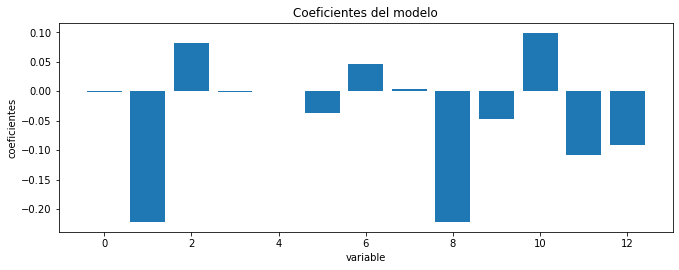

In [15]:
# Coeficientes del modelo
# ==============================================================================
fig, ax = plt.subplots(figsize=(11, 3.84))
ax.bar(range(13),modelo.coef_.flatten())
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo');

In [16]:
# Predicciones test
# ==============================================================================
predicciones = modelo.predict(X=X_test)
predicciones = predicciones.flatten()
predicciones

array([ 0.38783614,  0.60082571,  0.53917448,  0.08989162,  0.30489714,
        0.93505236,  0.56079557,  0.70835248,  0.10862435,  0.59245919,
        0.66071189, -0.22727909, -0.01627854,  0.93745471, -0.07836774,
        0.56839046,  0.69782396,  1.02188183,  0.62432365,  0.93349729,
        0.80385092,  0.79902283,  0.54528735,  0.21045247,  0.62219084,
        0.98176587,  0.23476372,  0.73806579,  0.92420154,  0.82686032,
        0.54271135,  1.00746145,  0.79274811,  0.05314534,  0.22339575,
        0.14603442,  0.64866764,  0.9054037 ,  0.85208508,  0.67785823,
        0.68151035, -0.03069665,  0.79806193,  0.6647969 ,  0.91459921,
        0.58710028,  0.52849035,  0.13248498,  0.17985137,  0.09075504,
        0.50014186,  0.34281774,  0.96608771,  0.26623845,  0.21126248,
        0.73435712,  0.53917448,  0.55366187,  0.52892783,  0.25832073,
        0.28585078,  0.18949494, -0.16925962,  0.9075685 ,  0.62704446,
        0.90469607,  1.16254697,  1.06798623,  0.50786826,  1.26

In [17]:
# Error de test del modelo 
# ==============================================================================
rmse_ols = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = False
           )
print("")
print(f"El error (rmse) de test es: {rmse_ols}")



El error (rmse) de test es: 0.3868113331464546


## Ridge (Cresta)

In [18]:
# Creación y entrenamiento del modelo (con búsqueda por CV del valor óptimo alpha)
# ==============================================================================
# Por defecto RidgeCV utiliza el mean squared error
modelo = RidgeCV(
            alphas          = np.logspace(-10, 2, 200),
            fit_intercept   = True,
            normalize       = True,
            store_cv_values = True
         )

_ = modelo.fit(X = X_train, y = y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), _RidgeGCV())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipel

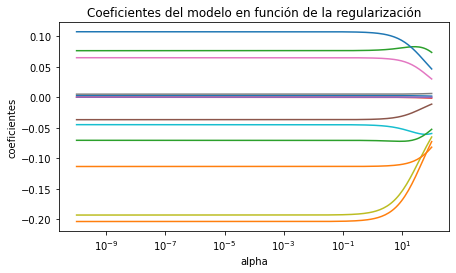

In [19]:
# Evolución de los coeficientes en función de alpha
# ==============================================================================
alphas = modelo.alphas
coefs = []

for alpha in alphas:
    modelo_temp = Ridge(alpha=alpha, fit_intercept=False, normalize=True)
    modelo_temp.fit(X_train, y_train)
    coefs.append(modelo_temp.coef_.flatten())

fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlabel('alpha')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo en función de la regularización');
plt.axis('tight')
plt.show()

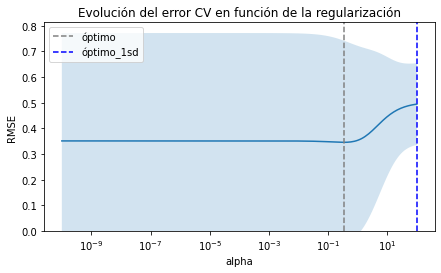

In [20]:
# Evolución del error en función de alpha
# ==============================================================================
# modelo.cv_values almacena el mse de cv para cada valor de alpha. Tiene
# dimensiones (n_samples, n_targets, n_alphas)
mse_cv = modelo.cv_values_.reshape((-1, 200)).mean(axis=0)
mse_sd = modelo.cv_values_.reshape((-1, 200)).std(axis=0)

# Se aplica la raíz cuadrada para pasar de mse a rmse
rmse_cv = np.sqrt(mse_cv)
rmse_sd = np.sqrt(mse_sd)

# Se identifica el óptimo y el óptimo + 1std
min_rmse     = np.min(rmse_cv)
sd_min_rmse  = rmse_sd[np.argmin(rmse_cv)]
min_rsme_1sd = np.max(rmse_cv[rmse_cv <= min_rmse + sd_min_rmse])
optimo       = modelo.alphas[np.argmin(rmse_cv)]
optimo_1sd   = modelo.alphas[rmse_cv == min_rsme_1sd]


# Gráfico del error +- 1 desviación estándar
############################################
fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(modelo.alphas, rmse_cv)
ax.fill_between(
    modelo.alphas,
    rmse_cv + rmse_sd,
    rmse_cv - rmse_sd,
    alpha=0.2
)

ax.axvline(
    x         = optimo,
    c         = "gray",
    linestyle = '--',
    label     = 'óptimo'
)

ax.axvline(
    x         = optimo_1sd,
    c         = "blue",
    linestyle = '--',
    label     = 'óptimo_1sd'
)
ax.set_xscale('log')
ax.set_ylim([0,None])
ax.set_title('Evolución del error CV en función de la regularización')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')
plt.legend();

In [21]:
# Mejor valor alpha encontrado
# ==============================================================================
print(f"Mejor valor de alpha encontrado: {modelo.alpha_}")

Mejor valor de alpha encontrado: 0.33700643292719246


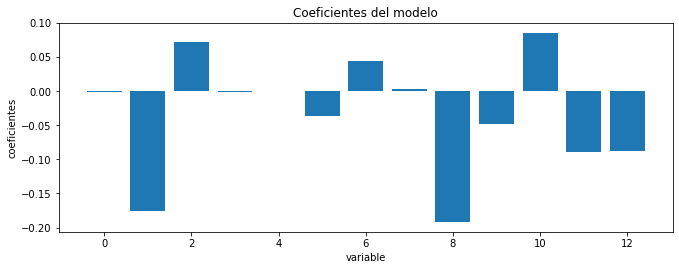

In [22]:
# Coeficientes del modelo
# ==============================================================================
fig, ax = plt.subplots(figsize=(11, 3.84))
ax.bar(range(13),modelo.coef_.flatten())
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo');

In [23]:
# Predicciones test
# ==============================================================================
predicciones = modelo.predict(X=X_test)
predicciones = predicciones.flatten()
predicciones

array([ 0.39859054,  0.60699217,  0.58565056,  0.13999531,  0.31200534,
        0.878105  ,  0.55013225,  0.70480805,  0.17448005,  0.60776037,
        0.64893622, -0.13414098,  0.03832708,  0.8923778 , -0.01391406,
        0.53886572,  0.67770028,  0.95231996,  0.61472081,  0.88088718,
        0.79373904,  0.78149957,  0.54917433,  0.24064149,  0.60916727,
        0.914578  ,  0.28013755,  0.73286092,  0.89327172,  0.78351199,
        0.56118403,  0.97481121,  0.74714635,  0.09232252,  0.25837937,
        0.20004135,  0.65205002,  0.86436209,  0.83666471,  0.67288502,
        0.66088174,  0.03797102,  0.76284731,  0.64956512,  0.89234487,
        0.57001765,  0.53616276,  0.17706741,  0.20500213,  0.15784848,
        0.54533134,  0.34378983,  0.93467574,  0.3087709 ,  0.25210521,
        0.74156243,  0.58565056,  0.55151409,  0.51073778,  0.29999541,
        0.33060886,  0.21956722, -0.09188391,  0.84417312,  0.61357454,
        0.87737015,  1.090237  ,  1.00406108,  0.5283541 ,  1.18

In [24]:
# Error de test del modelo 
# ==============================================================================
rmse_ridge = mean_squared_error(
                y_true  = y_test,
                y_pred  = predicciones,
                squared = False
             )
print("")
print(f"El error (rmse) de test es: {rmse_ridge}")


El error (rmse) de test es: 0.38526365647633004


Los errores de los modelos OLS y RIDGE son los siguientes 

In [25]:
rmse_ols, rmse_ridge,

(0.3868113331464546, 0.38526365647633004)

En conclusion, tanto para bridge como para OLS las colnmnas que se pueden usar son: sex,cp,exng,slp,caa,thall

In [26]:
X_sel=X.iloc[:,[1,2,8,10,11,12]]
X_sel

,sex,cp,exng,slp,caa,thall
0,1,3,0,0,0,1
1,1,2,0,0,0,2
2,0,1,0,2,0,2
3,1,1,0,2,0,2
4,0,0,1,2,0,2
...,...,...,...,...,...,...
298,0,0,1,1,0,3
299,1,3,0,1,0,3
300,1,0,0,1,2,3
301,1,0,1,1,1,3


CLASIFICACIÓN METODO DE VECINOS CERCANOS

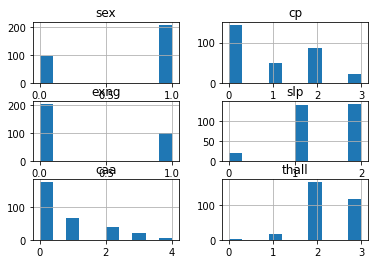

In [27]:
X_sel.hist()
plt.show()

In [29]:
X1_train, X1_test, y_train, y_test = model_selection.train_test_split(X_sel,y, test_size=0.25)
X1_train.shape, X1_test.shape, y_train.shape, y_test.shape

((227, 6), (76, 6), (227,), (76,))

Ahora se averigua el mejor K

In [30]:
for k in range(1,181,1):
    n_neighbors = k
    knn = KNeighborsClassifier(n_neighbors)
    knn.fit(X1_train, y_train)
    print('Precision en los valores de entrenamiento: {:.2f}'
        .format(knn.score(X1_train, y_train)))
    print('Precision en los valores de prueba: {:.2f}'
        .format(knn.score(X1_test, y_test)))

Precision en los valores de entrenamiento: 0.93
Precision en los valores de prueba: 0.72
Precision en los valores de entrenamiento: 0.87
Precision en los valores de prueba: 0.72
Precision en los valores de entrenamiento: 0.89
Precision en los valores de prueba: 0.79
Precision en los valores de entrenamiento: 0.87
Precision en los valores de prueba: 0.76
Precision en los valores de entrenamiento: 0.86
Precision en los valores de prueba: 0.82
Precision en los valores de entrenamiento: 0.86
Precision en los valores de prueba: 0.83
Precision en los valores de entrenamiento: 0.88
Precision en los valores de prueba: 0.82
Precision en los valores de entrenamiento: 0.88
Precision en los valores de prueba: 0.76
Precision en los valores de entrenamiento: 0.85
Precision en los valores de prueba: 0.82
Precision en los valores de entrenamiento: 0.85
Precision en los valores de prueba: 0.80
Precision en los valores de entrenamiento: 0.85
Precision en los valores de prueba: 0.80
Precision en los valo

Vemos que la mejor combinción de precisión que nos da es de 84% en el set de entrenamiento y del 84% para el de test para K=25.

In [32]:
clf = KNeighborsClassifier(n_neighbors=25)
clf.fit(X1_train, y_train)
print(clf.predict_proba([[1,3,0,0,0,1]]))

[[0.24 0.76]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


Para el ejemplo se puede observar que tiene 76% de probabilidad que tenga un paro cardiaco y el 24% que no tenga paro cardiaco

In [33]:
pred = clf.predict(X1_train)
print(confusion_matrix(y_train, pred))

[[ 74  25]
 [ 11 117]]


**CLASIFICADOR BAYESIANO INGENUO**

In [34]:
clf1 = GaussianNB()
clf1.fit(X1_train, y_train)
print(clf1.predict_proba([[1,3,0,0,0,1]]))

[[0.08246541 0.91753459]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  "X does not have valid feature names, but"


Para el ejemplo se puede observar que tiene 91.75% de probabilidad que tenga un paro cardiaco y el 8.24% que no tenga paro cardiaco

---



In [35]:
accuracy_score(y_train, clf1.predict(X1_train))

0.8370044052863436

In [36]:
confusion_matrix(y_train, clf1.predict(X1_train))

array([[ 78,  21],
       [ 16, 112]])

In [37]:
accuracy_score(y_test, clf1.predict(X1_test))

0.8026315789473685

In [38]:
confusion_matrix(y_test, clf1.predict(X1_test))

array([[29, 10],
       [ 5, 32]])

Vemos que la mejor combinción de precisión que nos da es de 83.7% en el set de entrenamiento y del 80.26% para el de test

**CLASIFICADOR REDES NEURONALES**

In [40]:
mlp=MLPClassifier(hidden_layer_sizes=(8,8,8), max_iter=500, alpha=0.0001,
                     solver='adam', random_state=21,tol=0.000000001)
mlp.fit(X1_train,y_train)
print(mlp.predict_proba([[1,3,0,0,0,1]]))

[[0.26999173 0.73000827]]


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"


Para el ejemplo se puede observar que tiene 73% de probabilidad que tenga un paro cardiaco y el 26.99% que no tenga paro cardiaco

In [41]:
accuracy_score(y_train, mlp.predict(X1_train))

0.8546255506607929

In [42]:
confusion_matrix(y_train, mlp.predict(X1_train))

array([[ 77,  22],
       [ 11, 117]])

In [43]:
accuracy_score(y_test, mlp.predict(X1_test))

0.8157894736842105

In [44]:
confusion_matrix(y_test, mlp.predict(X1_test))

array([[30,  9],
       [ 5, 32]])

Vemos que la mejor combinción de precisión que nos da es de 85.46% en el set de entrenamiento y del 81.57% para el de test

Conclusion\
Lo que se puedo observar es que el clasificador de redes neuronales tiene un 85.46% de proximidad en entrenamiento y el mejor clasificador para el test es el de vecino cercanos con K=25 y una proximidad del 84%.
